#Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import warnings, gc, joblib, time
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

#Input Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp Data Science Dibimbing/Final Project/Clean_Dataset.csv')

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Data with no transit flight

In [ ]:
df_no_transit = df.copy()

In [ ]:
df_no_transit = df_no_transit[df_no_transit['stops'] == 'zero']
df_no_transit

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
299945,Air_India,AI-545,Chennai,Evening,zero,Night,Hyderabad,Business,1.42,45,15000
299987,Air_India,AI-545,Chennai,Evening,zero,Night,Hyderabad,Business,1.42,46,15000
300029,Air_India,AI-545,Chennai,Evening,zero,Night,Hyderabad,Business,1.42,47,15000
300069,Air_India,AI-545,Chennai,Night,zero,Night,Hyderabad,Business,1.33,48,15000


# Missing Values



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#Duplicated Values

In [ ]:
df.duplicated().sum()

0

#Data Analysis

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


Insight :
- duration : Mean > Median, Right Skewed
- days_left : Mean = MediaN
- price = Mean > median, Right Skewed, and

<Axes: xlabel='duration', ylabel='Density'>

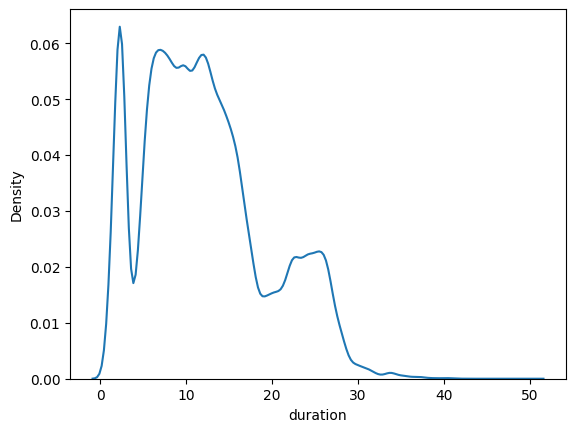

In [ ]:
sns.kdeplot(data = df, x = 'duration')

The most duration flight is 1-3

<Axes: xlabel='days_left', ylabel='Density'>

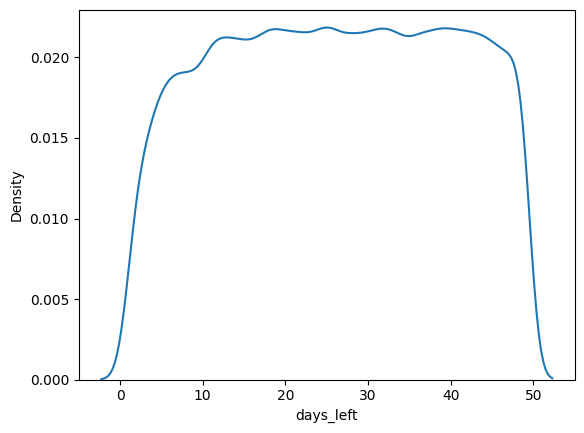

In [ ]:
sns.kdeplot(data = df, x = 'days_left')

days_lest have peaek around 11-45 wich indicate the flight are mostly sold when 11-45 days left

<Axes: xlabel='price', ylabel='Density'>

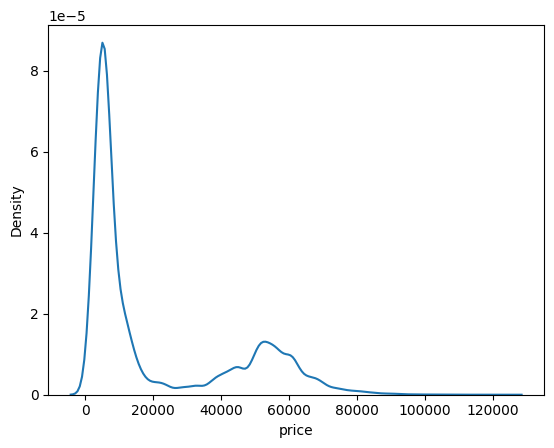

In [ ]:
sns.kdeplot(data = df, x = 'price')

Price have peak around 0 - 20000

#Business questions

##Which airline has the most frequency of flights?

In [ ]:
airline_counts = df['airline'].value_counts()
airline_counts

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

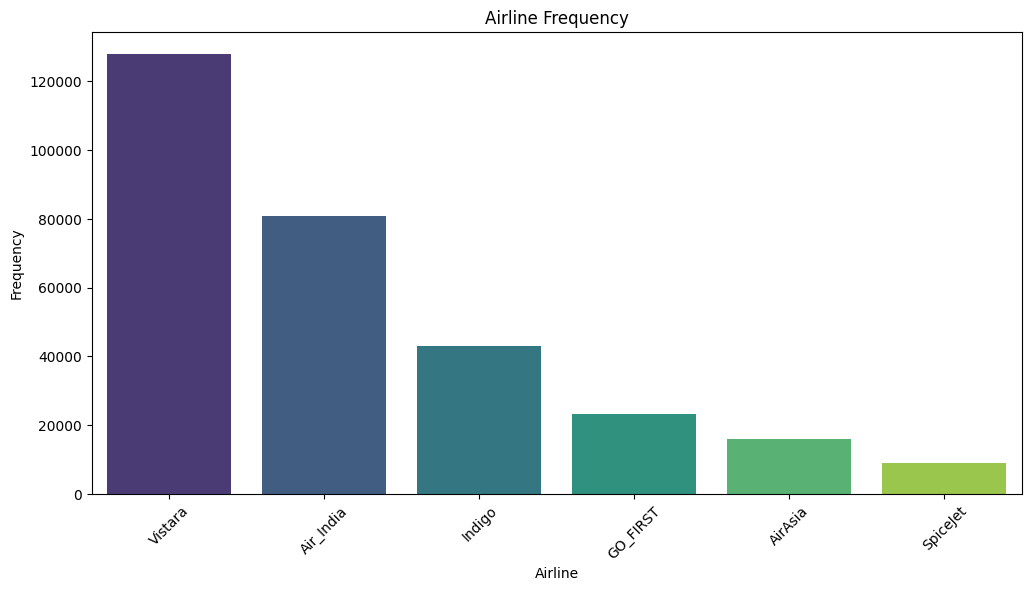

In [ ]:
desteny_counts = df['airline'].value_counts()

desteny_counts = desteny_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=desteny_counts.index, y=desteny_counts.values,palette='viridis')
plt.title('Airline Frequency')
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Vistara has the most flight frequencies

##Which destinations have the most flights?

In [ ]:
destination_counts = df['destination_city'].value_counts()
destination_counts

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

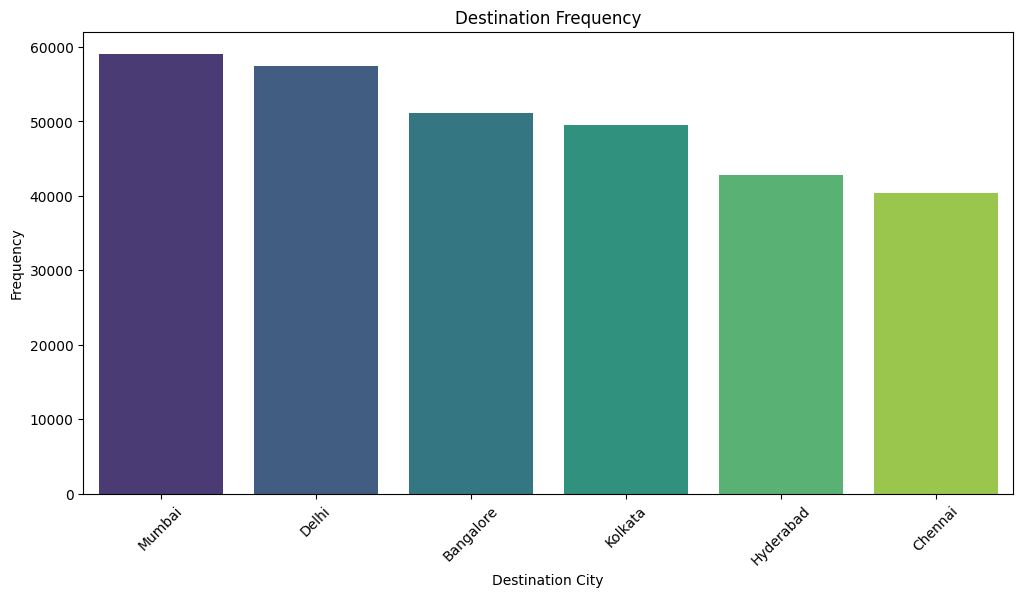

In [ ]:
destination_counts = df['destination_city'].value_counts()

destination_counts = destination_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=destination_counts.index, y=destination_counts.values,palette='viridis')
plt.title('Destination Frequency')
plt.xlabel('Destination City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Mumbai is the city most often used as a destination

##How is the price affected when tickets are bought in just 1 or 2 days before departure for each airline?

In [ ]:
df_days_left = df.groupby(['days_left'])['price'].mean().reset_index()
df_days_left.head()

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368


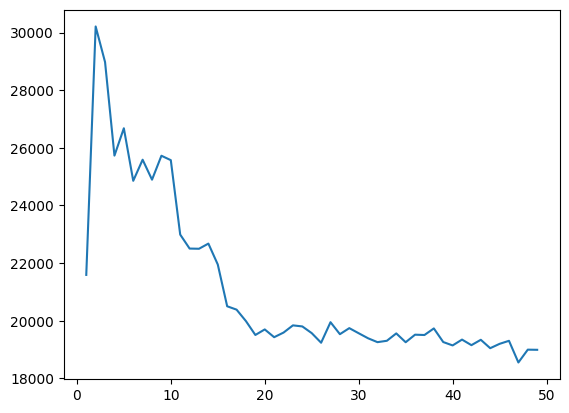

In [ ]:
plt.plot(df_days_left['days_left'],df_days_left['price'])

<Axes: xlabel='airline', ylabel='price'>

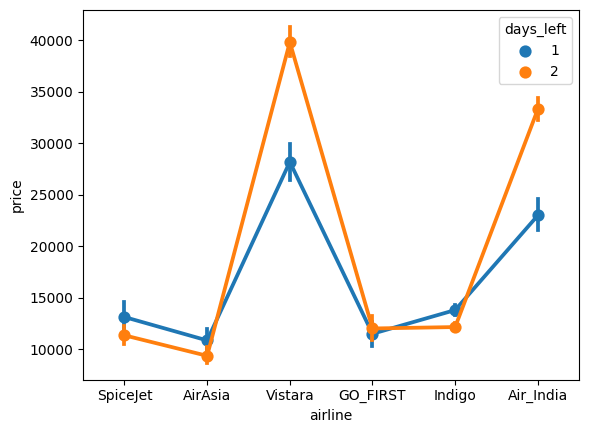

In [ ]:
filtered_data = df[df['days_left'].isin([1, 2])]
sns.pointplot(data=filtered_data, x='airline', y='price', hue='days_left')

There was an increase in flight prices on days_left 3 - 2, then a decrease in prices on days_left 1

Price increase trend based on days_left on Vistara and Air_India airline and Mumbai and Delhi city

In [ ]:
df_vistara = df[df['airline']=='Vistara']
df_vistara_days_left = df_vistara.groupby(['days_left'])['price'].mean().reset_index()
df_vistara_days_left.head()

,days_left,price
0,1,28188.201950
1,2,39808.801423
2,3,38911.834053
3,4,35310.988511
4,5,34793.902605


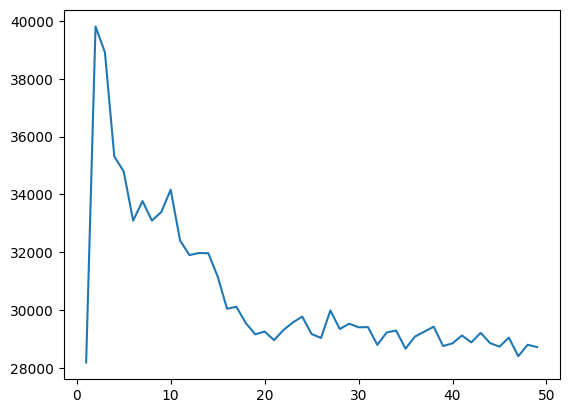

In [ ]:
plt.plot(df_vistara_days_left['days_left'],df_vistara_days_left['price'])

In [ ]:
df_air_india = df[df['airline']=='Air_India']
df_air_india_days_left = df_air_india.groupby(['days_left'])['price'].mean().reset_index()
df_air_india_days_left.head()

,days_left,price
0,1,22995.676786
1,2,33291.213889
2,3,31648.958306
3,4,26415.199390
4,5,26999.791265


In [ ]:
df_mumbai = df[df['destination_city']=='Mumbai']
df_mumbai_days_left = df_mumbai.groupby(['days_left'])['price'].mean().reset_index()
df_mumbai_days_left.head()

,days_left,price
0,1,20982.274725
1,2,31340.490931
2,3,31575.331742
3,4,28288.153770
4,5,27415.648045


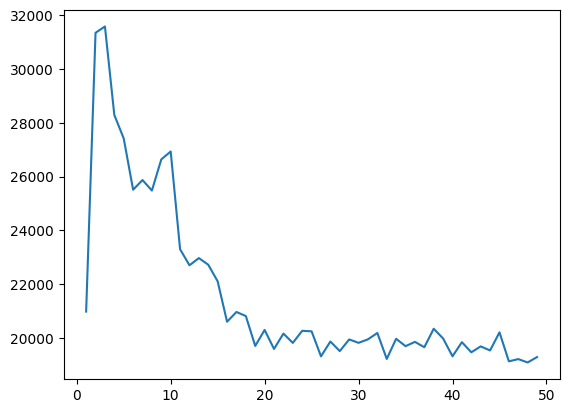

In [ ]:
plt.plot(df_mumbai_days_left['days_left'],df_mumbai_days_left['price'])

In [ ]:
df_delhi = df[df['destination_city']=='Delhi']
df_delhi_days_left = df_delhi.groupby(['days_left'])['price'].mean().reset_index()
df_delhi_days_left.head()

,days_left,price
0,1,20722.648148
1,2,28066.413013
2,3,28147.815385
3,4,24147.063895
4,5,25064.602539


Price trends based on days_left seen on Vistara and Air_India airline and Mumbai and Delhi city destinations also have an upward trend on days_left 3 - 2 and down on days_left 1

##Do tickets change depending on departure time and arrival time?

In [ ]:
group_departure = df.groupby(['departure_time'])['price'].mean().sort_values(ascending=False)
group_departure

departure_time
Night            23062.146808
Morning          21630.760254
Evening          21232.361894
Early_Morning    20370.676718
Afternoon        18179.203331
Late_Night        9295.299387
Name: price, dtype: float64

<Axes: xlabel='departure_time'>

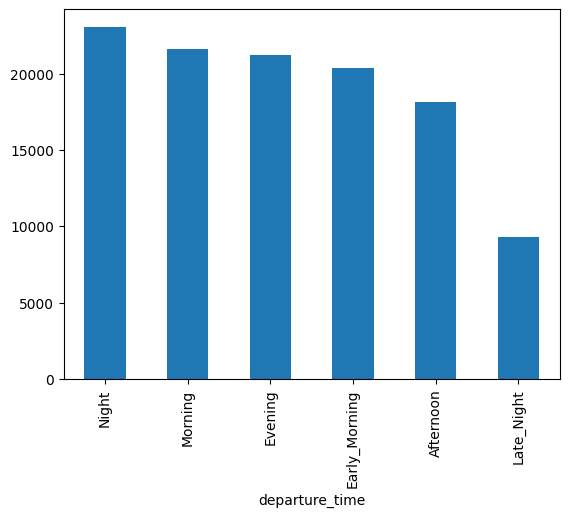

In [ ]:
group_departure.plot(kind='bar')

In [ ]:
group_arrival = df.groupby(['arrival_time'])['price'].mean().sort_values(ascending=False)
group_arrival

arrival_time
Evening          23044.371615
Morning          22231.076098
Night            21586.758341
Afternoon        18494.598993
Early_Morning    14993.139521
Late_Night       11284.906078
Name: price, dtype: float64

<Axes: xlabel='arrival_time'>

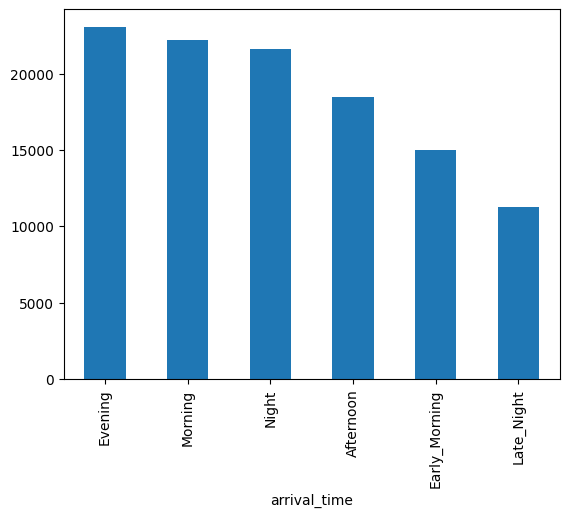

In [ ]:
group_arrival.plot(kind='bar')

In [ ]:
grouped_data_time = df.groupby(['departure_time','arrival_time'])['price'].mean().sort_values(ascending=False)
grouped_data_time

departure_time  arrival_time 
Night           Evening          31425.824194
Early_Morning   Late_Night       29638.037500
Late_Night      Night            29439.811321
Evening         Morning          28326.216482
Night           Afternoon        28115.362126
Morning         Night            26827.897551
Afternoon       Morning          26056.580994
Early_Morning   Night            25792.007764
Night           Morning          25573.642137
Evening         Afternoon        25569.672277
Early_Morning   Evening          24804.077441
Evening         Evening          24612.547643
Morning         Late_Night       23624.505755
                Early_Morning    22625.786578
                Evening          21636.529952
Late_Night      Evening          21217.106383
Afternoon       Early_Morning    21159.511401
                Night            19097.798757
Late_Night      Afternoon        18520.684932
Evening         Early_Morning    18175.929529
Night           Night            17817.956009
Morn

<Axes: xlabel='departure_time,arrival_time'>

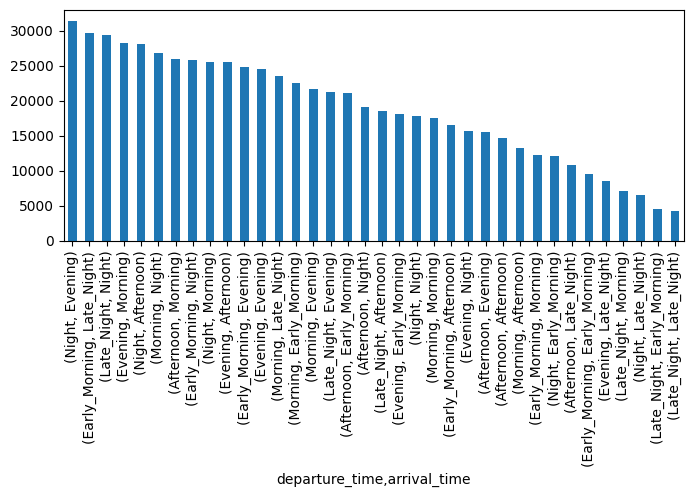

In [ ]:
fig = plt.figure(figsize = (8, 3))
grouped_data_time.plot(kind='bar')

- In data based on departures, the highest prices are for Night departures and the lowest prices are for Late_Night departures
- In data based on information, the highest price is for arrivals in the Evening and the lowest price is for arrivals at Late_Night
- If you look at departures and arrivals, the highest ticket prices are for Night departures and Evening arrivals and the lowest prices are for Late_Night departures and Late_Night arrivals.

Check trends on Vistara and Air India airlines as well as Mumbai and Delhi city

Departure

In [ ]:
group_vistara_departure = df_vistara.groupby(['departure_time'])['price'].mean().sort_values(ascending=False)
group_vistara_departure

departure_time
Evening          31081.607169
Night            31029.404964
Morning          30608.385707
Early_Morning    30021.534979
Afternoon        28656.015157
Name: price, dtype: float64

<Axes: xlabel='departure_time'>

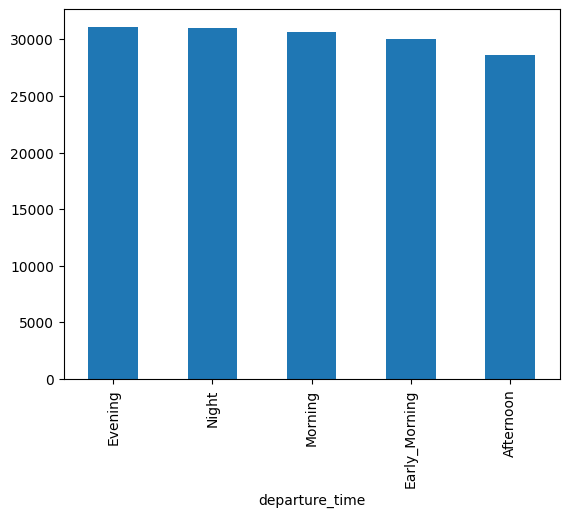

In [ ]:
group_vistara_departure.plot(kind='bar')

In [ ]:
group_air_india_departure = df_air_india.groupby(['departure_time'])['price'].mean().sort_values(ascending=False)
group_air_india_departure

departure_time
Late_Night       26479.151203
Night            25968.716429
Afternoon        23789.167617
Evening          23366.248792
Early_Morning    23346.060200
Morning          21747.785007
Name: price, dtype: float64

<Axes: xlabel='departure_time'>

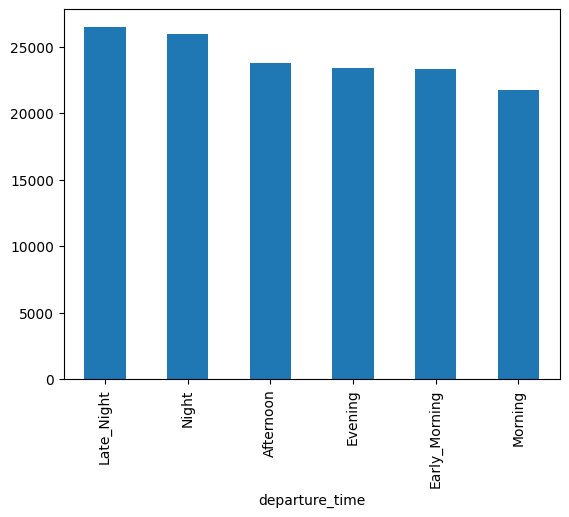

In [ ]:
group_air_india_departure.plot(kind='bar')

In [ ]:
group_mumbai_departure = df_mumbai.groupby(['departure_time'])['price'].mean().sort_values(ascending=False)
group_mumbai_departure

departure_time
Morning          23239.078018
Night            23175.394477
Early_Morning    22112.193315
Evening          19442.883079
Afternoon        18151.758242
Late_Night        9416.627706
Name: price, dtype: float64

<Axes: xlabel='departure_time'>

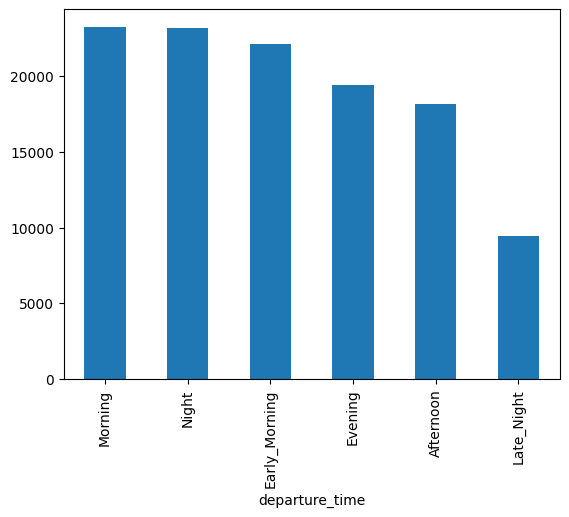

In [ ]:
group_mumbai_departure.plot(kind='bar')

In [ ]:
group_delhi_departure = df_delhi.groupby(['departure_time'])['price'].mean().sort_values(ascending=False)
group_delhi_departure

departure_time
Night            21034.412242
Morning          19609.755171
Evening          17930.530082
Early_Morning    17667.813443
Afternoon        15818.752124
Late_Night       12610.598930
Name: price, dtype: float64

<Axes: xlabel='departure_time'>

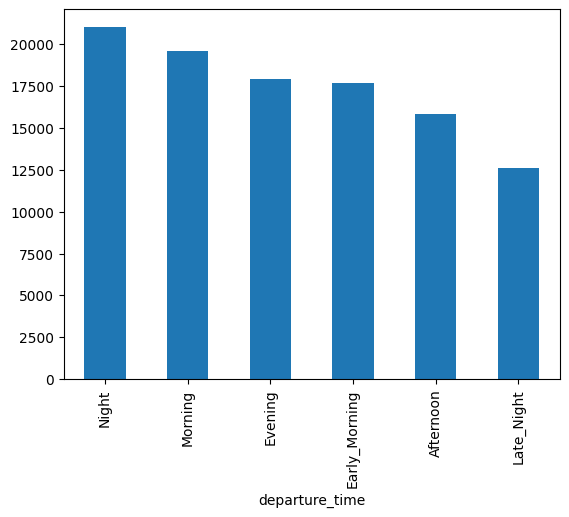

In [ ]:
group_delhi_departure.plot(kind='bar')

Arrival

In [ ]:
group_vistara_arrival = df_vistara.groupby(['arrival_time'])['price'].mean().sort_values(ascending=False)
group_vistara_arrival

arrival_time
Evening          31225.269687
Night            30773.372570
Morning          30180.664694
Late_Night       29699.180243
Early_Morning    28597.738475
Afternoon        27905.873134
Name: price, dtype: float64

<Axes: xlabel='arrival_time'>

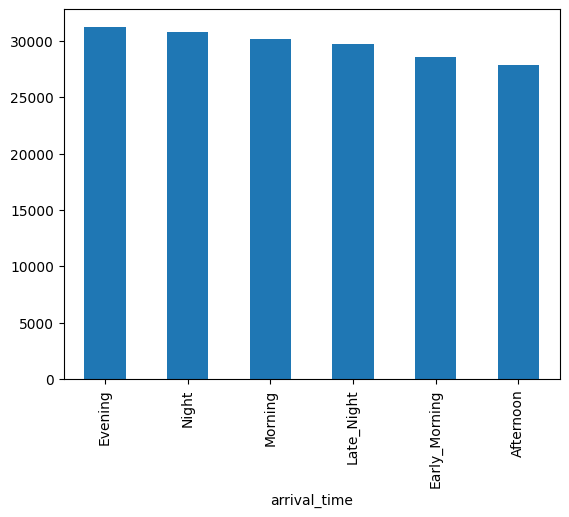

In [ ]:
group_vistara_arrival.plot(kind='bar')

In [ ]:
group_air_india_arrival = df_air_india.groupby(['arrival_time'])['price'].mean().sort_values(ascending=False)
group_air_india_arrival

arrival_time
Late_Night       28014.163158
Evening          24459.593397
Night            23683.386323
Afternoon        23426.571700
Morning          22792.180401
Early_Morning    18805.551542
Name: price, dtype: float64

<Axes: xlabel='arrival_time'>

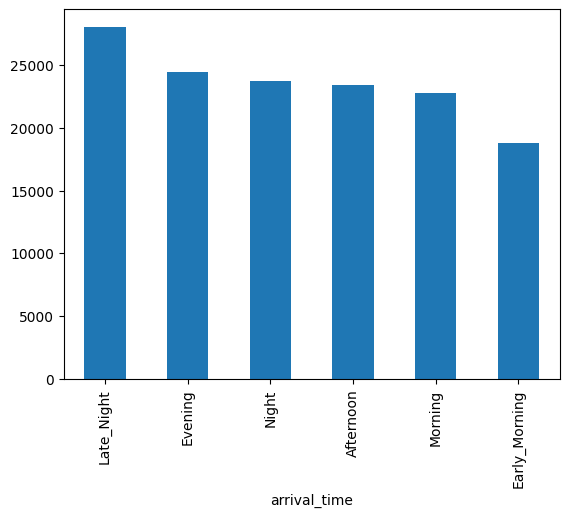

In [ ]:
group_air_india_arrival.plot(kind='bar')

In [ ]:
group_mumbai_arrival = df_mumbai.groupby(['arrival_time'])['price'].mean().sort_values(ascending=False)
group_mumbai_arrival

arrival_time
Night            24279.142949
Evening          21632.587194
Morning          21518.442521
Afternoon        19978.788775
Early_Morning    13225.005033
Late_Night        5142.619559
Name: price, dtype: float64

<Axes: xlabel='arrival_time'>

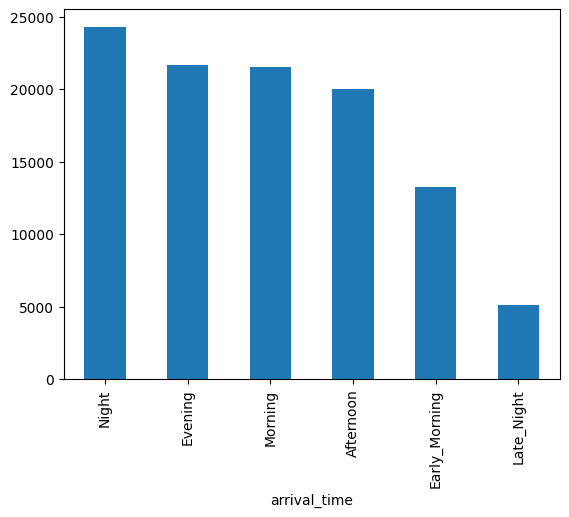

In [ ]:
group_mumbai_arrival.plot(kind='bar')

In [ ]:
group_delhi_arrival = df_delhi.groupby(['arrival_time'])['price'].mean().sort_values(ascending=False)
group_delhi_arrival

arrival_time
Morning          19539.753240
Afternoon        19350.553498
Night            19349.174956
Evening          19168.058393
Late_Night       12137.817503
Early_Morning     7422.930970
Name: price, dtype: float64

<Axes: xlabel='arrival_time'>

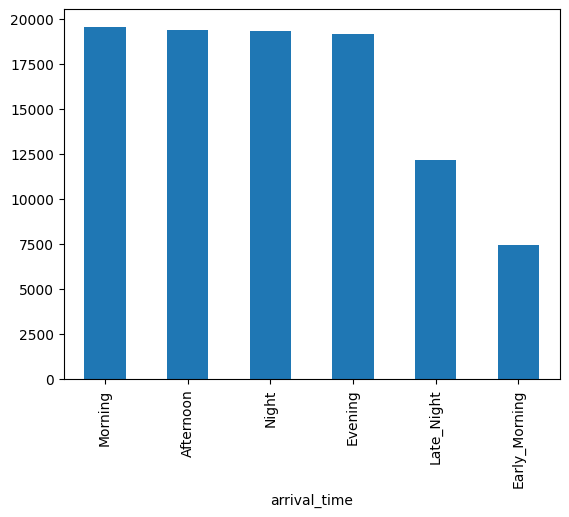

In [ ]:
group_delhi_arrival.plot(kind='bar')

##What is the average flight price with different number of stops?

In [ ]:
avg_price_by_stop = df.groupby(['stops'])['price'].mean().sort_values(ascending=False)
avg_price_by_stop

stops
one            22900.992482
two_or_more    14113.450775
zero            9375.938535
Name: price, dtype: float64

<Axes: xlabel='stops'>

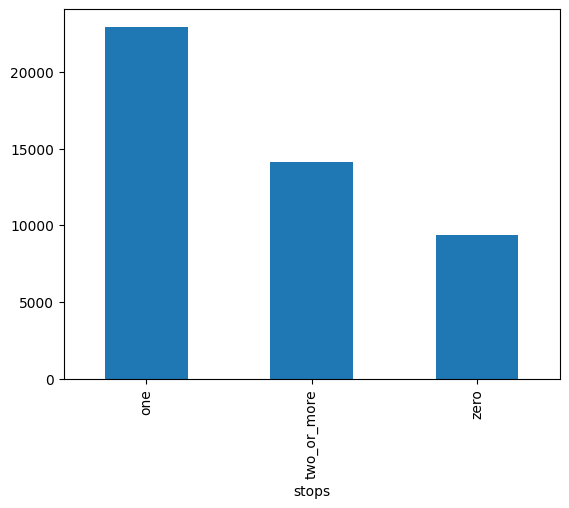

In [ ]:
avg_price_by_stop.plot(kind='bar')

<Axes: xlabel='price', ylabel='Density'>

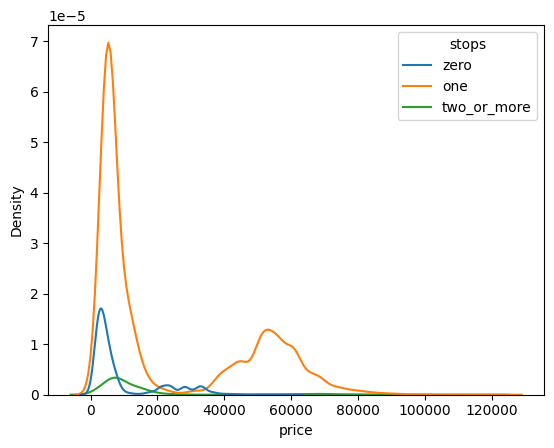

In [ ]:
sns.kdeplot(data=df,x='price',hue='stops')

Flights with 1 stop are the most expensive, flights without stops are the cheapest and most frequent

In [ ]:
avg_vistara_price_by_stop = df_vistara.groupby(['stops'])['price'].mean().sort_values(ascending=False)
avg_vistara_price_by_stop

stops
one            32353.149720
two_or_more    18850.767996
zero           16416.273587
Name: price, dtype: float64

<Axes: xlabel='stops'>

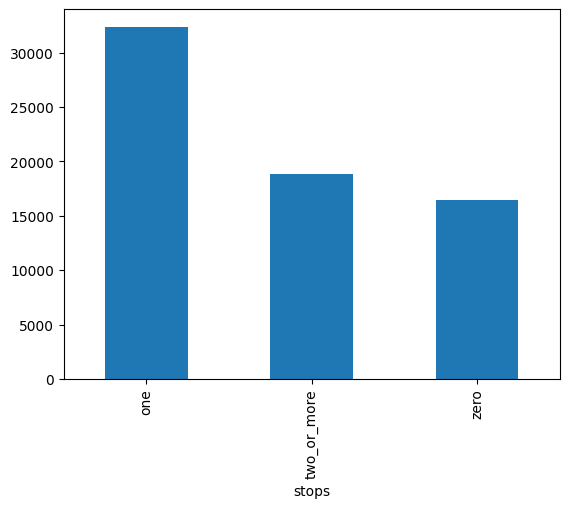

In [ ]:
avg_vistara_price_by_stop.plot(kind='bar')

In [ ]:
avg_air_india_price_by_stop = df_air_india.groupby(['stops'])['price'].mean().sort_values(ascending=False)
avg_air_india_price_by_stop

stops
one            24805.782885
zero           14403.191918
two_or_more    13771.177062
Name: price, dtype: float64

<Axes: xlabel='stops'>

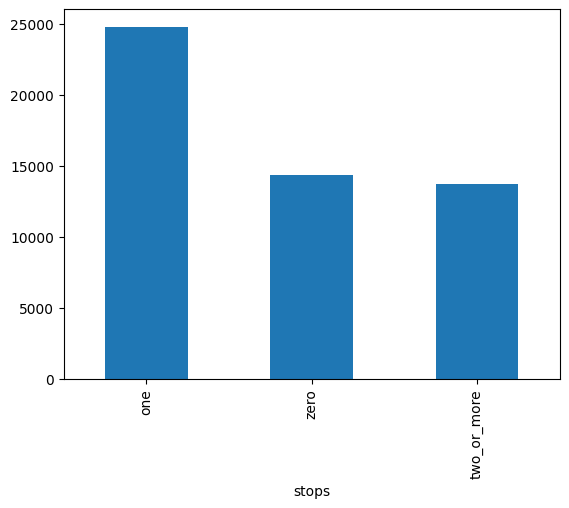

In [ ]:
avg_air_india_price_by_stop.plot(kind='bar')

In [ ]:
avg_mumbai_price_by_stop = df_mumbai.groupby(['stops'])['price'].mean().sort_values(ascending=False)
avg_mumbai_price_by_stop

stops
one            23397.090109
two_or_more    15763.252822
zero            9757.318012
Name: price, dtype: float64

<Axes: xlabel='stops'>

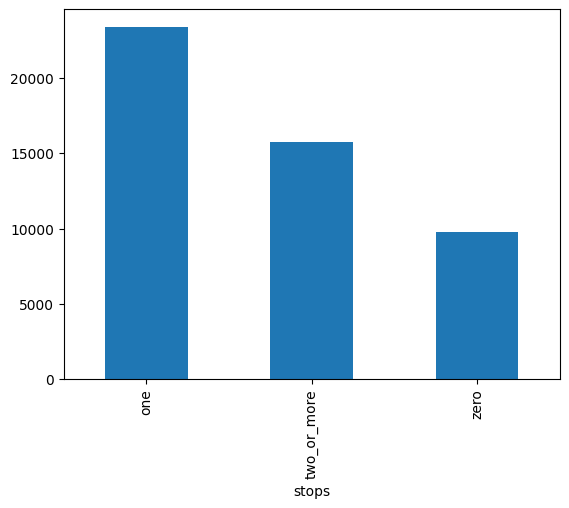

In [ ]:
avg_mumbai_price_by_stop.plot(kind='bar')

In [ ]:
avg_delhi_price_by_stop = df_delhi.groupby(['stops'])['price'].mean().sort_values(ascending=False)
avg_delhi_price_by_stop

stops
one            20091.481197
zero           11624.361391
two_or_more     7463.531210
Name: price, dtype: float64

<Axes: xlabel='stops'>

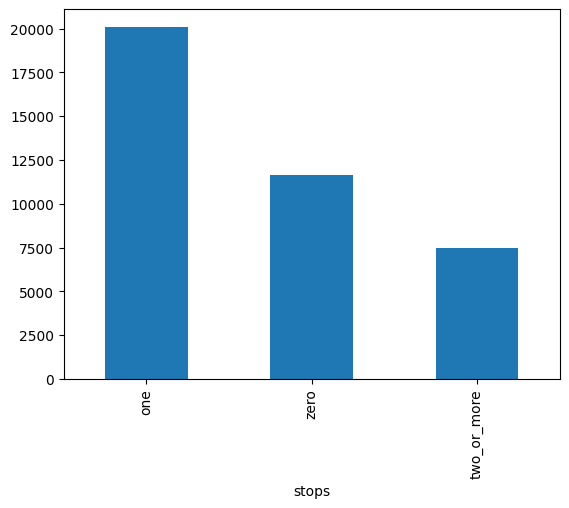

In [ ]:
avg_delhi_price_by_stop.plot(kind='bar')

#Prediction

##Preparation

###Unique Values

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
categorical_column = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

unique_values_dict = {}

for column in categorical_column:
    unique_values = df[column].unique()
    unique_values_dict[column] = unique_values

for column, unique_values in unique_values_dict.items():
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'airline':
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Unique values in 'flight':
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']

Unique values in 'source_city':
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Unique values in 'departure_time':
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Unique values in 'stops':
['zero' 'one' 'two_or_more']

Unique values in 'arrival_time':
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Unique values in 'destination_city':
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Unique values in 'class':
['Economy' 'Business']



##Encoding

In [ ]:
category_to_integer = {
    'airline': {'SpiceJet': 0, 'AirAsia': 1, 'Vistara': 2, 'GO_FIRST': 3, 'Indigo': 4, 'Air_India': 5},
    'source_city': {'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5},
    'departure_time': { 'Late_Night': 0,'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5},
    'stops': {'zero': 0, 'one': 1, 'two_or_more': 2},
    'arrival_time': { 'Late_Night': 0,'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5},
    'destination_city': {'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5},
    'class': {'Economy': 0, 'Business': 1}
}

In [ ]:
df_update = df.copy()

In [ ]:
df_update.replace(category_to_integer, inplace=True)

In [ ]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


In [ ]:
for column in df_update.select_dtypes(include=['object']).columns:
    df_update[column + '_Kode'] = df_update[column].astype('category').cat.codes

df_update.drop(df_update.select_dtypes(include=['object']).columns, axis=1, inplace=True)
df_update.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_Kode
0,0,0,4,0,5,1,0,2.17,1,5953,1408
1,0,0,1,0,2,1,0,2.33,1,5953,1387
2,1,0,1,0,1,1,0,2.17,1,5956,1213
3,2,0,2,0,3,1,0,2.25,1,5955,1559
4,2,0,2,0,2,1,0,2.33,1,5955,1549


In [ ]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  int64  
 6   class             300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
 10  flight_Kode       300153 non-null  int16  
dtypes: float64(1), int16(1), int64(9)
memory usage: 23.5 MB


##Outlier

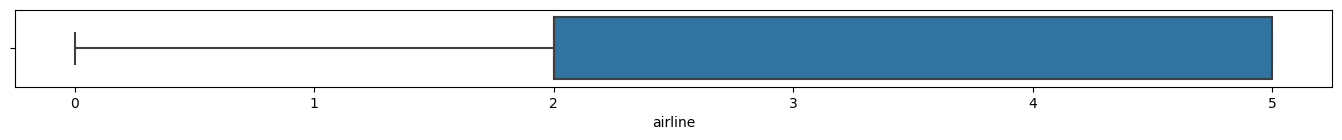

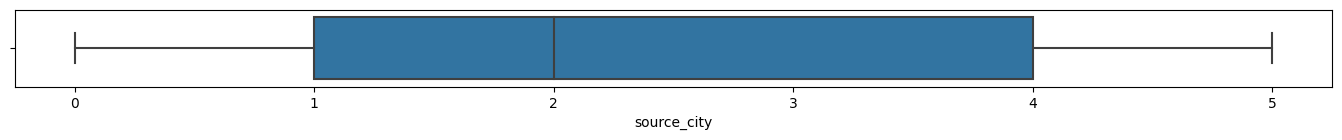

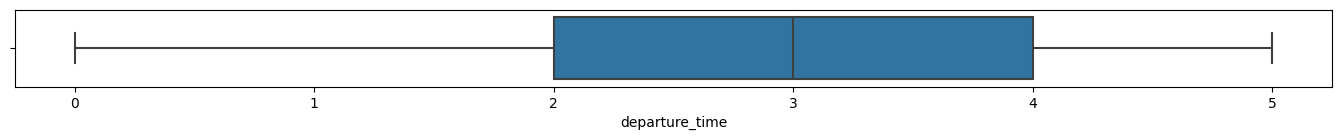

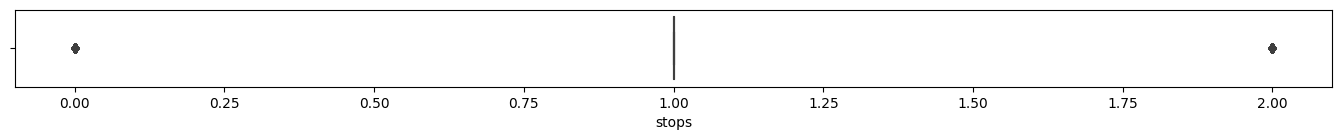

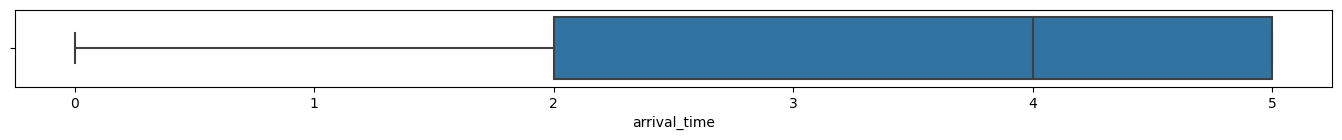

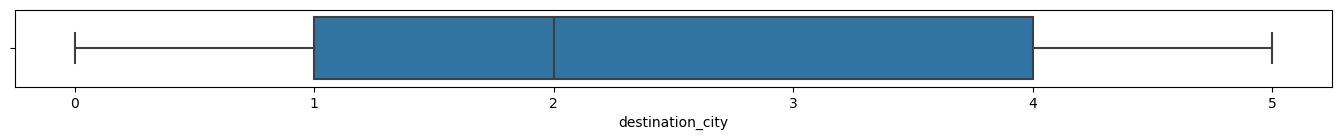

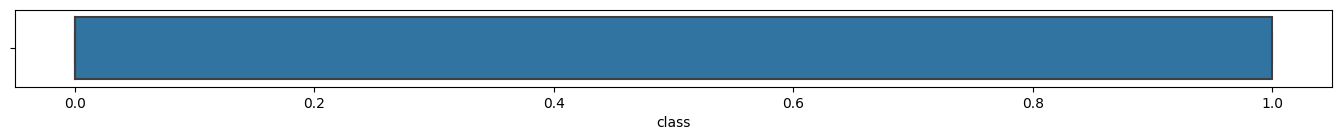

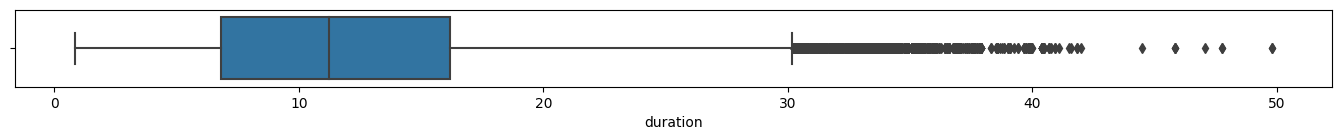

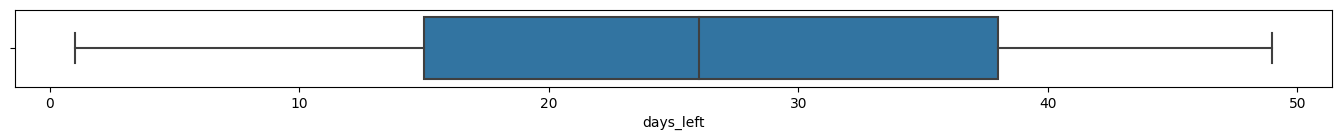

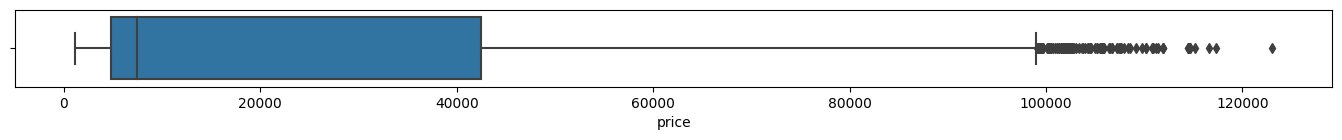

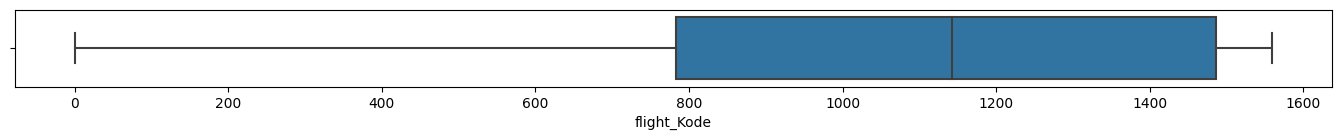

In [ ]:
for column in df_update.columns:
    plt.figure(figsize=(17, 1))
    sns.boxplot(data=df_update, x=column)
    plt.show()

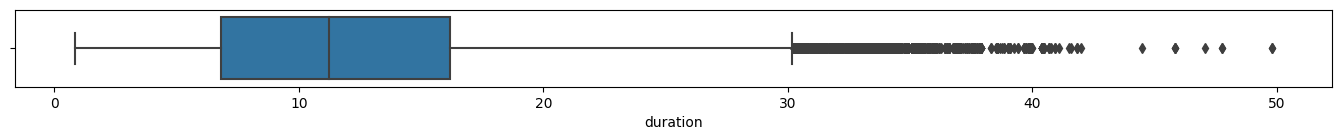

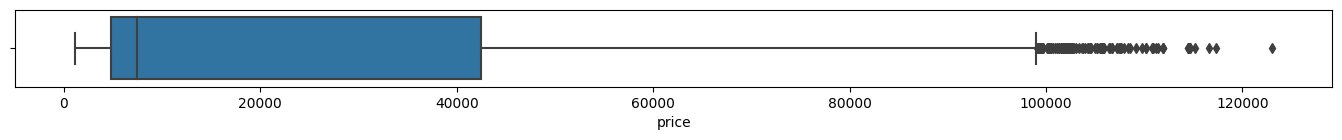

In [ ]:
features = ["duration", "price"]

for column in df_update[features]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data = df_update, x = column)

##Model Test Without Multicolinarity Check

In [ ]:
df_update3 = df_update.copy()

In [ ]:
X = df_update3.drop('price',axis=1)
y = df_update3.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50,shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((210107, 10), (90046, 10))

In [ ]:
models = []
r2_scores = []
mape_scores = []
rmse_scores = []

In [ ]:
def train_and_evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    mape = mean_absolute_percentage_error(y_test,y_pred)
    print("R2 Score:",r2)
    print("RMSE:",rmse)
    print("MAPE:",mape)
    models.append(model)
    r2_scores.append(r2)
    mape_scores.append(mape)
    rmse_scores.append(rmse)
    gc.collect()

In [ ]:
train_and_evaluate_model(LinearRegression())

R2 Score: 0.9052034603234299
RMSE: 6995.062098363235
MAPE: 0.4320129203721328


In [ ]:
train_and_evaluate_model(Lasso())

R2 Score: 0.9052026963204769
RMSE: 6995.09028629789
MAPE: 0.4318007585726568


In [ ]:
train_and_evaluate_model(Ridge())

R2 Score: 0.9052033692586201
RMSE: 6995.065458210802
MAPE: 0.43201092158580257


In [ ]:
train_and_evaluate_model(KNeighborsRegressor())

R2 Score: 0.45953524456173744
RMSE: 16702.405413370634
MAPE: 1.1274907291411584


In [ ]:
train_and_evaluate_model(DecisionTreeRegressor())

R2 Score: 0.9831633420042688
RMSE: 2947.971475421818
MAPE: 0.06071711059833793


In [ ]:
train_and_evaluate_model(RandomForestRegressor())

R2 Score: 0.9897389859422818
RMSE: 2301.3913329601605
MAPE: 0.059404008786965674


In [ ]:
train_and_evaluate_model(XGBRegressor())

R2 Score: 0.9835964699975314
RMSE: 2909.8057018432537
MAPE: 0.13305859524194036


##Multicolinarity

VIF Score

In [ ]:
X = df_update.drop('price', axis=1)
y = df_update['price']

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

           Features        VIF
0           airline   6.484712
1       source_city   2.762337
2    departure_time   4.943998
3             stops   8.155466
4      arrival_time   6.419326
5  destination_city   2.958340
6             class   1.638510
7          duration   5.686253
8         days_left   4.420301
9       flight_Kode  10.342949


Drop airline_kode and flight_kode

<Axes: >

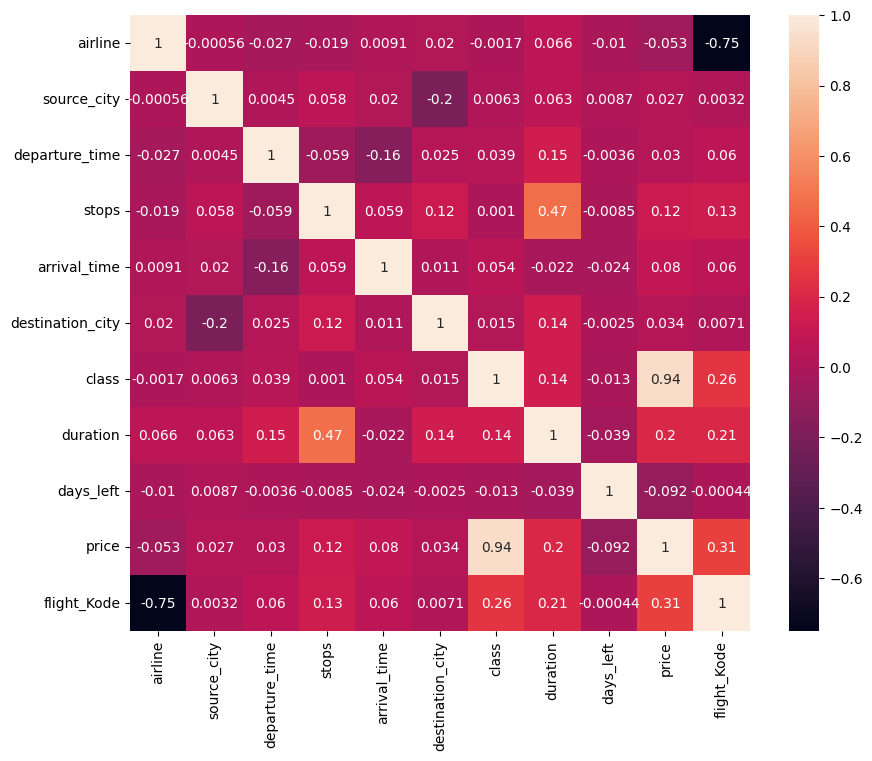

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_update.corr(), annot= True)

In [ ]:
df_update2 = df_update.copy()

In [ ]:
df_update2

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_Kode
0,0,0,4,0,5,1,0,2.17,1,5953,1408
1,0,0,1,0,2,1,0,2.33,1,5953,1387
2,1,0,1,0,1,1,0,2.17,1,5956,1213
3,2,0,2,0,3,1,0,2.25,1,5955,1559
4,2,0,2,0,2,1,0,2.33,1,5955,1549
...,...,...,...,...,...,...,...,...,...,...,...
300148,2,5,2,1,4,4,1,10.08,49,69265,1477
300149,2,5,3,1,5,4,1,10.42,49,77105,1481
300150,2,5,1,1,5,4,1,13.83,49,79099,1486
300151,2,5,1,1,4,4,1,10.00,49,81585,1483


In [ ]:
df_update2 = df_update2.drop(['flight_Kode','stops'], axis=1)

In [ ]:
X = df_update2.drop('price', axis=1)
y = df_update2['price']

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

           Features       VIF
0           airline  4.542652
1       source_city  2.634899
2    departure_time  4.262613
3      arrival_time  4.849482
4  destination_city  2.820938
5             class  1.482467
6          duration  4.026593
7         days_left  3.931267


##Model

In [ ]:
X = df_update2.drop('price',axis=1)
y = df_update2.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50,shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((210107, 8), (90046, 8))

In [ ]:
models = []
r2_scores = []
mape_scores = []
rmse_scores = []

In [ ]:
def train_and_evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    mape = mean_absolute_percentage_error(y_test,y_pred)
    print("R2 Score:",r2)
    print("RMSE:",rmse)
    print("MAPE:",mape)
    models.append(model)
    r2_scores.append(r2)
    mape_scores.append(mape)
    rmse_scores.append(rmse)
    gc.collect()

In [ ]:
train_and_evaluate_model(LinearRegression())

R2 Score: 0.8972397679329371
RMSE: 7282.959084377491
MAPE: 0.37919495140614534


In [ ]:
train_and_evaluate_model(Lasso())

R2 Score: 0.897239598453168
RMSE: 7282.965090172195
MAPE: 0.37917653989462513


In [ ]:
train_and_evaluate_model(Ridge())

R2 Score: 0.8972397060080597
RMSE: 7282.961278788074
MAPE: 0.37920564694524567


In [ ]:
train_and_evaluate_model(KNeighborsRegressor())

R2 Score: 0.7411215972939587
RMSE: 11559.611597927958
MAPE: 0.7231749204483674


In [ ]:
train_and_evaluate_model(DecisionTreeRegressor())

R2 Score: 0.9751881718452198
RMSE: 3578.695228133519
MAPE: 0.078969683080197


In [ ]:
train_and_evaluate_model(RandomForestRegressor())

R2 Score: 0.9845870845126028
RMSE: 2820.5755078914335
MAPE: 0.07586543197701334


In [ ]:
train_and_evaluate_model(XGBRegressor())

R2 Score: 0.9762581726524437
RMSE: 3500.679917447881
MAPE: 0.1537592994246622


##Model training With Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the dataset
feature = df_update2.drop(columns='price')
target = df_update2[['price']]

feature_train, feature_test, target_train, target_test = train_test_split(
    feature, target, test_size=0.20, random_state=42
)

In [ ]:
# Define the model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Retrieve the feature importances
feature_importances = random_forest_reg.feature_importances_

# Create a dataframe to display feature importances
coef_df = pd.DataFrame({
    'feature': feature.columns.tolist(),
    'importance': feature_importances
})

coef_df = coef_df.sort_values(by='importance', ascending=False)
print(coef_df)

            feature  importance
5             class    0.879932
6          duration    0.060545
7         days_left    0.018705
0           airline    0.010742
4  destination_city    0.010336
1       source_city    0.010302
3      arrival_time    0.005238
2    departure_time    0.004198


##Model Training Without Multicolinarity With Random forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Split the dataset
feature = df_update3.drop(columns='price')
target = df_update3[['price']]

feature_train, feature_test, target_train, target_test = train_test_split(
    feature, target, test_size=0.20, random_state=42
)

In [ ]:
# Define the model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Retrieve the feature importances
feature_importances = random_forest_reg.feature_importances_

# Create a dataframe to display feature importances
coef_df = pd.DataFrame({
    'feature': feature.columns.tolist(),
    'importance': feature_importances
})

coef_df = coef_df.sort_values(by='importance', ascending=False)
print(coef_df)

            feature  importance
6             class    0.879552
7          duration    0.048554
9       flight_Kode    0.030251
8         days_left    0.017813
5  destination_city    0.010200
1       source_city    0.005548
3             stops    0.002564
4      arrival_time    0.002424
2    departure_time    0.002092
0           airline    0.001001
